# Multiple Linear Regression 

In [2]:
# import necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# import data
# https://www.kaggle.com/datasets/abhishek14398/50startups
data = pd.read_csv('../Data/50_Startups_dataset.csv')
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [4]:
# drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Profit', axis=1),
                                                    data['Profit'],
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 4), (10, 4), (40,), (10,))

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()

# data preprocessing 
preprocessor = ColumnTransformer(transformers=[
    ('num_scaler', StandardScaler(), numeric_cols ),
    ('encoder', OneHotEncoder(drop='first'), ['State']) # omits one dummy variable to byepass dummy variable trap
], remainder='passthrough')

# creating the regressor 
regressor = LinearRegression()

# create the pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# fit the pipeline 
pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('regressor', LinearRegression())])

In [8]:
X_train['State'].unique()

array(['Florida', 'California', 'New York'], dtype=object)

Since there are three unique values in the `State` column of the X_train, when `OneHotEncoder()` is applied it will create three dummy variables. However, two dummy variables are sufficient. Hence, the `OneHotEncoder(drop='first')` drops one dummy variable.  

## 🎭 What Is the Dummy Variable Trap?

It’s a situation where **one-hot encoded categorical variables** introduce **multicollinearity** into your dataset—that is, one feature becomes **predictable from others**, leading to **redundancy**.

---

### 📦 Real-Life Analogy:

Let’s say you’re encoding a column called `Color` with three categories:
- Red  
- Green  
- Blue

**One-hot encoding** creates 3 binary columns:

| Color_Red | Color_Green | Color_Blue |
|-----------|-------------|------------|
| 1         | 0           | 0          |
| 0         | 1           | 0          |
| 0         | 0           | 1          |

But here’s the thing:  
🔁 If you know **any two**, you can **always guess the third**. For example, if `Color_Red = 0` and `Color_Green = 0`, then `Color_Blue` must be 1.

That’s **linear dependence**, and it can **confuse linear models** like Linear Regression or Logistic Regression.

---

## ⚠️ Why It’s a Problem
In models like:
- Linear Regression
- Logistic Regression

...multicollinearity causes:
- Coefficient instability
- Incorrect interpretations
- Model fitting issues

---

## ✅ How to Avoid the Dummy Variable Trap

Drop one of the dummy variables. You still retain all the information but avoid redundancy.

In **pandas**:
```python
pd.get_dummies(df['Color'], drop_first=True)
```

In **Scikit-learn**:
    
```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(df[['Color']])
```

---

## 🚀 Bonus Tip
If you're using **tree-based models** (like Random Forest, XGBoost), this isn’t a big issue—they handle categorical splits more robustly. But for linear models, **always watch out for the dummy variable trap**!

---

In [9]:
preprocessor.fit_transform(X_train)

array([[ 0.34202149,  0.22787678,  0.12425038,  1.        ,  0.        ],
       [ 1.36207849, -1.0974737 ,  1.14990688,  1.        ,  0.        ],
       [-0.71081297, -2.5770186 , -0.34136825,  0.        ,  0.        ],
       [ 0.90611438,  1.0172367 ,  0.66890185,  0.        ,  1.        ],
       [ 1.40997088, -0.09115403,  1.30006861,  0.        ,  1.        ],
       [ 1.20367103,  0.96116332, -0.95248784,  0.        ,  0.        ],
       [-1.05285826, -1.34392538, -0.62843389,  1.        ,  0.        ],
       [-1.61480906, -0.19649414,  0.54106768,  1.        ,  0.        ],
       [-1.642623  ,  0.52691442, -2.07854935,  0.        ,  0.        ],
       [ 0.77885123,  0.05437051,  0.2294954 ,  0.        ,  1.        ],
       [ 0.96515572, -0.45976843,  0.61043134,  0.        ,  0.        ],
       [ 0.00687736,  0.01677049,  0.25215324,  0.        ,  0.        ],
       [-0.01361318, -0.80643974, -0.83912073,  0.        ,  1.        ],
       [-0.66099544,  1.34830937, -0.2

In [10]:
# get the parameters of the model 
intercept = pipeline.named_steps['regressor'].intercept_
coef = pipeline.named_steps['regressor'].coef_

print(f'The intercept of the model is : {intercept} and the coeffecient is : {coef}')

The intercept of the model is : 115320.97192585879 and the coeffecient is : [ 3.81022693e+04 -1.86475430e+03  3.38617581e+03  9.38793006e+02
  6.98775997e+00]


In [11]:
# predict 
y_predict = pipeline.predict(X_test)
y_predict

array([126362.97908252,  84608.55383643,  99677.59425155,  46357.56068582,
       128750.58288497,  50912.51741905, 109741.450327  , 100643.34281644,
        97599.375746  , 113097.52524437])

R² Score: 0.899
MSE: 82010363.045
RMSE: 9055.957
MAE: 6961.478


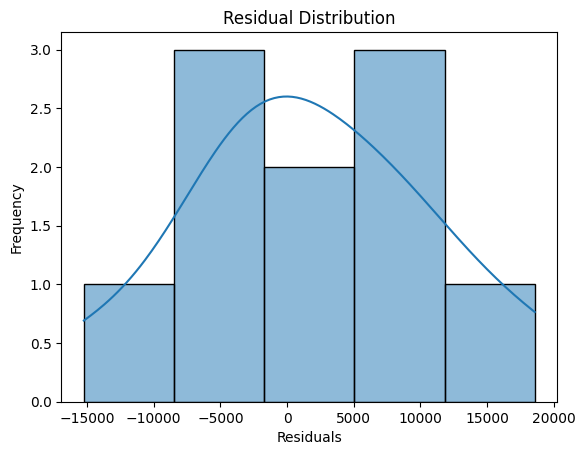

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

**Detailed summary chart** comparing various **feature selection methods** in **scikit-learn**, their best use cases, advantages, disadvantages, and whether they can be used inside a **Pipeline**.

---

## **📊 Feature Selection Methods in Scikit-Learn: Comparison Chart**

| **Method**                   | **Best For**                                      | **How It Works**                                     | **Pros**                                      | **Cons**                                          | **Pipeline Compatible?** |
|------------------------------|--------------------------------------------------|-----------------------------------------------------|-----------------------------------------------|--------------------------------------------------|--------------------------|
| **RFE (Recursive Feature Elimination)** | Linear models, models with coefficients | Recursively removes least important features based on model performance | ✔ Works well with small datasets  <br> ✔ Selects optimal feature subset | ❌ Computationally expensive <br> ❌ Can be unstable with correlated features | ✅ Yes |
| **SelectKBest** | Quick feature filtering using statistics | Selects top K features based on statistical tests (ANOVA, Chi-square, etc.) | ✔ Fast and simple <br> ✔ Works for regression & classification | ❌ Ignores feature interactions <br> ❌ Requires choosing K manually | ✅ Yes |
| **SelectFromModel** | Models with built-in feature importance (Lasso, RandomForest, etc.) | Uses model coefficients (`coef_`) or feature importances (`feature_importances_`) | ✔ Automatically selects important features <br> ✔ Works well with Lasso, Trees | ❌ Model-dependent <br> ❌ Can be sensitive to hyperparameters | ✅ Yes |
| **Lasso Regression (L1 Regularization)** | Feature selection & regression in one step | Shrinks some coefficients to **exactly zero**, removing unimportant features | ✔ Works for high-dimensional data <br> ✔ No need for separate feature selection | ❌ Requires hyperparameter tuning (`alpha`) <br> ❌ May not work well if features are highly correlated | ✅ Yes |
| **Mutual Information** | Detecting **non-linear** dependencies | Measures mutual dependence between features & target | ✔ Captures **non-linear** relationships <br> ✔ Works with categorical & continuous data | ❌ Computationally expensive <br> ❌ Needs tuning (`discretization`) | ❌ No (Requires manual selection) |
| **Permutation Importance** | Most robust feature ranking | Shuffles each feature and measures performance drop | ✔ Works for **any model** <br> ✔ Not affected by scaling | ❌ Expensive for large datasets <br> ❌ Can be noisy | ❌ No (Requires manual analysis) |

---

## **🚀 Which Method Should You Use?**
| **Your Need** | **Recommended Feature Selection Method** |
|--------------|---------------------------------------|
| Fast & simple selection | **SelectKBest** |
| Best for regression with many features | **Lasso (L1 Regularization)** |
| Feature importance from models | **SelectFromModel (Lasso, RandomForest, XGBoost, etc.)** |
| Finds **non-linear** relationships | **Mutual Information** |
| Most **robust** feature ranking | **Permutation Importance** |

### 🚀 Pipeline with RFE & ColumnTransformer

In [16]:
from sklearn.feature_selection import RFE


# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# Feature Selection using RFE with Linear Regression
rfe = RFE(estimator=LinearRegression(),
          n_features_to_select=3) # select the top 3 features 

regressor = LinearRegression()

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', rfe),
    ('regressor', regressor)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scalar',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('feature_selection',
                 RFE(estimator=LinearRegression(), n_features_to_select=3)),
                ('regressor', LinearRegression())])

In [ ]:
# Get selected feature mask
selected_features = pipeline.named_steps['feature_selection'].support_
selected_features

array([ True,  True,  True, False, False])

In [23]:
# get the features selected 
all_features = np.array(numeric_cols + list(
    pipeline.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out()
))
selected_feature_names = all_features[selected_features]
selected_feature_names

array(['R&D Spend', 'Administration', 'Marketing Spend'], dtype='<U15')

In [25]:
# intercept and coeff 
print(f'Intercept : {pipeline.named_steps['regressor'].intercept_}')
print(f'Coeffecients : {pipeline.named_steps['regressor'].coef_}')

Intercept : 115651.8205
Coeffecients : [38014.73625775 -1841.47578233  3543.38628169]


In [27]:
# let us now predict 
y_predict = pipeline.predict(X_test)

R² Score: 0.900
MSE: 80926321.223
RMSE: 8995.906
MAE: 6979.152


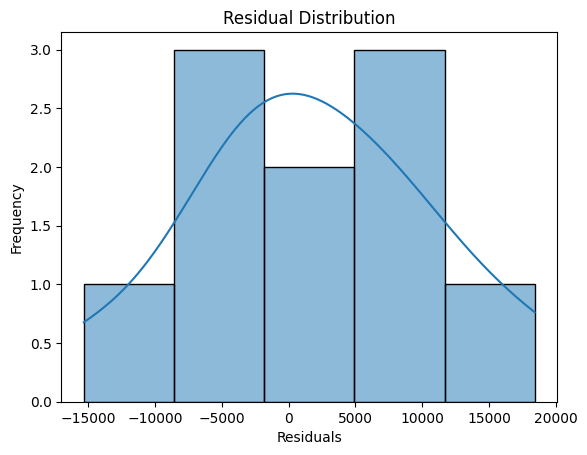

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## Pipeline with `SelectFromModel`

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso


# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# Feature selection using Lasso (L1 Regularization)
feature_selector = SelectFromModel(Lasso(alpha=0.01))

regressor = LinearRegression()

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('regressor', regressor)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scalar',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('feature_selection',
                 SelectFromModel(estimator=Lasso(alpha=0.01))),
                ('regressor', LinearRegression())])

In [ ]:
# get the features selected 
all_features = np.array(numeric_cols + list(
    pipeline.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out()
))

selected_features = pipeline.named_steps['feature_selection'].get_support()
selected_feature_names = all_features[selected_features]
selected_feature_names

array(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'], dtype='<U15')

R² Score: 0.899
MSE: 82010363.045
RMSE: 9055.957
MAE: 6961.478


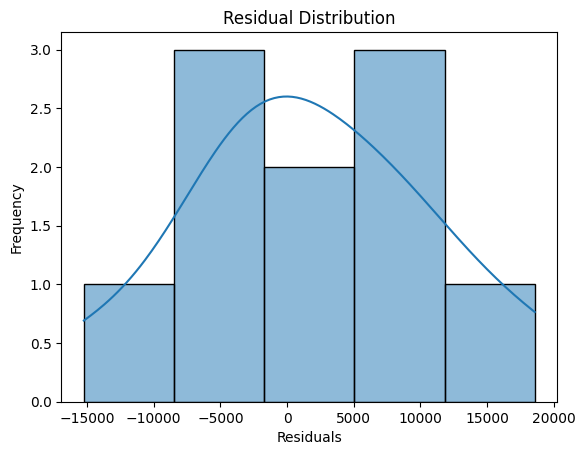

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
y_predict = pipeline.predict(X_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## Pipeline with `SelectKBest`

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Lasso


# Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = ['State']  # Example categorical column

# Data Preprocessing (Scaling & Encoding)
preprocessor = ColumnTransformer(transformers=
                                 [('num_scalar', StandardScaler(), numeric_cols),
                                  ('encoder', OneHotEncoder(drop='first'), categorical_cols)],
                                 remainder='passthrough')

# Feature selection using Lasso (L1 Regularization)
feature_selector = SelectKBest(score_func=f_regression, k=3)

regressor = LinearRegression()

# Define Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selector),
    ('regressor', regressor)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_scalar',
                                                  StandardScaler(),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['State'])])),
                ('feature_selection',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x000001F81A2C2160>)),
                ('regressor', LinearRegression())])

In [34]:
# get the features selected 
all_features = np.array(numeric_cols + list(
    pipeline.named_steps['preprocessor'].named_transformers_['encoder'].get_feature_names_out()
))

selected_features = pipeline.named_steps['feature_selection'].get_support()
selected_feature_names = all_features[selected_features]
selected_feature_names

array(['R&D Spend', 'Marketing Spend', 'State_New York'], dtype='<U15')

`f_regression` is a **statistical scoring function** used in feature selection, especially with tools like `SelectKBest` in scikit-learn. It's designed for **regression tasks**, and it evaluates each feature’s **linear relationship with the target variable** using **univariate linear regression tests**.

---

### 🔍 What Does `f_regression` Do?

It computes:
- **F-statistic** for each feature
- Corresponding **p-value**

The **F-statistic** measures how much a feature explains the variance in the target variable — higher means more predictive power.

---

### 📌 Where Is It Used?

Typically used with `SelectKBest`:
```python
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)
```

---

### 📐 How Does It Work?

For each feature \( X_i \) and target \( y \):
1. A **simple linear regression** is performed.
2. The **F-statistic** is calculated:  
   \[
   F = \frac{\text{variance explained by } X_i}{\text{unexplained variance}}
   \]
3. A **p-value** is generated to test the null hypothesis that there's **no relationship** between the feature and the target.

---

### ✅ When to Use `f_regression`?

- When you're working on a **regression problem**
- You want **quick filtering** of the most linearly correlated features

---

### 🚫 Limitations

- Only captures **linear relationships**
- Doesn’t consider interactions between features
- Doesn’t work for **classification** tasks (use `f_classif` instead)

---

R² Score: 0.916
MSE: 67943465.807
RMSE: 8242.783
MAE: 6430.578


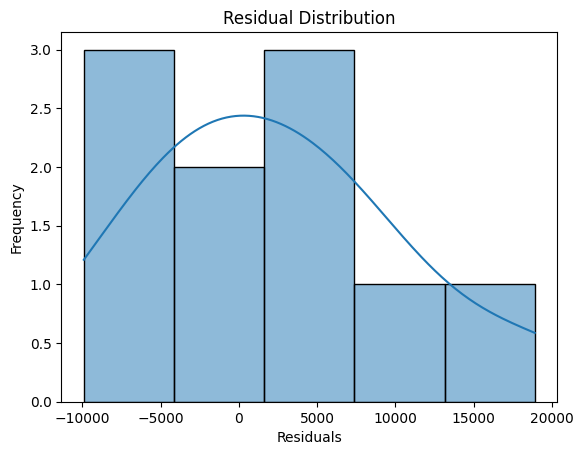

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Evaluate the model
y_predict = pipeline.predict(X_test)

r2 = r2_score(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")

# Residual Plot
residuals = y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()